In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")


In [10]:
import pandas as pd

data = pd.read_csv(r"C:\Users\pc\Downloads\Hotel_Bookings2.csv", sep=";")
print(data.head())



          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [11]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
print(data["hotel"].unique())


['Resort Hotel' 'City Hotel']


In [13]:
rh_all = data[data["hotel"] == "Resort Hotel"]["hotel"].count()
rh_canceled = data[(data["hotel"] == "Resort Hotel")&(data["is_canceled"] == 1)]["hotel"].count()

ch_all = data[data["hotel"] == "City Hotel"]["hotel"].count()
ch_canceled = data[(data["hotel"] == "City Hotel")&(data["is_canceled"] == 1)]["hotel"].count()

print(rh_all, ch_all)

40060 79330


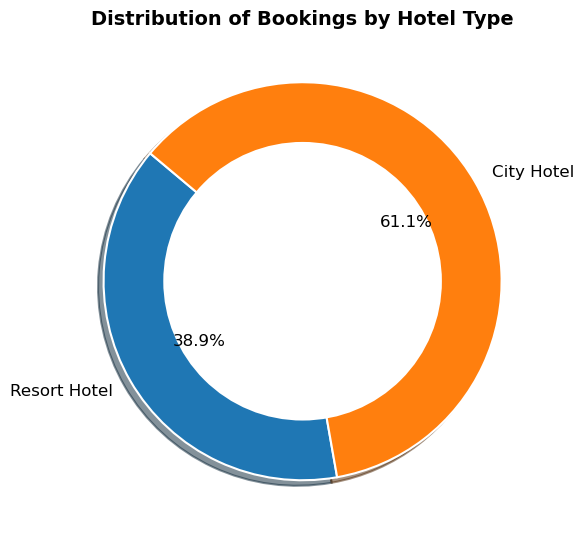

In [34]:
import matplotlib.pyplot as plt

rh_all = 35000
ch_all = 55000

labels = ["Resort Hotel", "City Hotel"]
values = [rh_all, ch_all]

colors = ["#1f77b4", "#ff7f0e"]  

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops=dict(edgecolor="white", linewidth=1.5),
    textprops=dict(color="black", fontsize=12)
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Titre
ax.set_title("Distribution of Bookings by Hotel Type", fontsize=14, fontweight='bold')

# Affichage
plt.tight_layout()
plt.show()


In [15]:
canceled = ((rh_canceled + ch_canceled) / (rh_all+ch_all)) * 100 
not_canceled = 100 - canceled
canceled


37.041628277075134

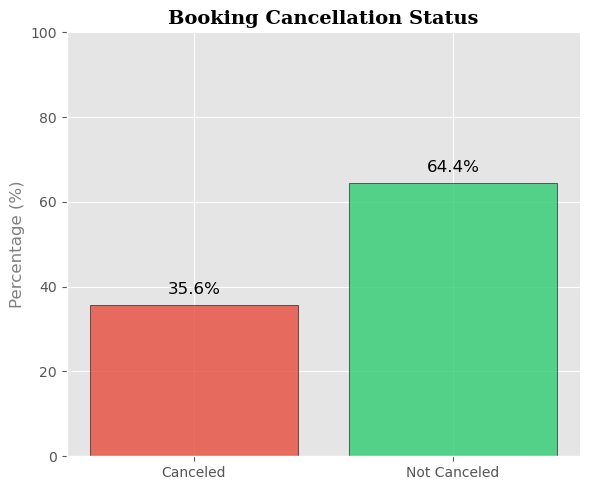

In [35]:
import matplotlib.pyplot as plt

canceled = 35.6
not_canceled = 64.4

labels = ["Canceled", "Not Canceled"]
values = [canceled, not_canceled]
colors = ["#e74c3c", "#2ecc71"]  

fig, ax = plt.subplots(figsize=(6, 5))

bars = ax.bar(labels, values, color=colors, alpha=0.8, edgecolor="black")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, f"{height:.1f}%", 
            ha='center', va='bottom', fontsize=12, color="black")

ax.set_title("Booking Cancellation Status", fontsize=14, fontweight="bold", fontname="DejaVu Serif")
ax.set_ylabel("Percentage (%)", fontsize=12, color="gray")
ax.set_ylim(0, 100)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


In [17]:
rh_canceled = (rh_canceled / rh_all) * 100
rh_notcanceled = 100 - rh_canceled

ch_canceled = (ch_canceled / ch_all) * 100
ch_notcanceled = 100 - ch_canceled

print(rh_canceled, ch_canceled)

27.763354967548675 41.72696331778646


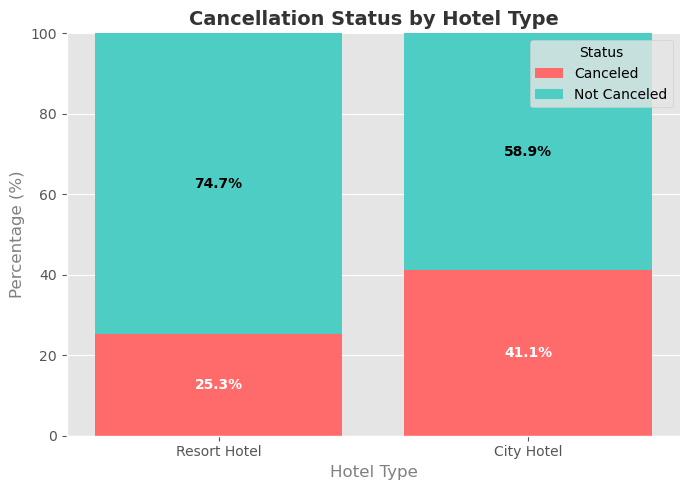

In [37]:
import matplotlib.pyplot as plt
import numpy as np

rh_canceled = 25.3
rh_notcanceled = 74.7
ch_canceled = 41.1
ch_notcanceled = 58.9

categories = ['Resort Hotel', 'City Hotel']
subcategories = ['Canceled', 'Not Canceled']

canceled_values = [rh_canceled, ch_canceled]
not_canceled_values = [rh_notcanceled, ch_notcanceled]

colors = ['#FF6B6B', '#4ECDC4']  

fig, ax = plt.subplots(figsize=(7, 5))

bars1 = ax.bar(categories, canceled_values, color=colors[0], label=subcategories[0])
bars2 = ax.bar(categories, not_canceled_values, bottom=canceled_values, color=colors[1], label=subcategories[1])

for i in range(len(categories)):
    ax.text(i, canceled_values[i] / 2, f"{canceled_values[i]:.1f}%", ha='center', va='center', color='white', fontweight='bold', fontsize=10)
    ax.text(i, canceled_values[i] + not_canceled_values[i] / 2, f"{not_canceled_values[i]:.1f}%", ha='center', va='center', color='black', fontweight='bold', fontsize=10)

ax.set_xlabel("Hotel Type", fontsize=12, color="gray")
ax.set_ylabel("Percentage (%)", fontsize=12, color="gray")
ax.set_title("Cancellation Status by Hotel Type", fontsize=14, fontweight='bold', color='#333333')
ax.set_ylim(0, 100)
ax.legend(title="Status")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


In [19]:
data.groupby(["hotel", "arrival_date_year"]).size().unstack()


arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,13682,38140,27508
Resort Hotel,8314,18567,13179


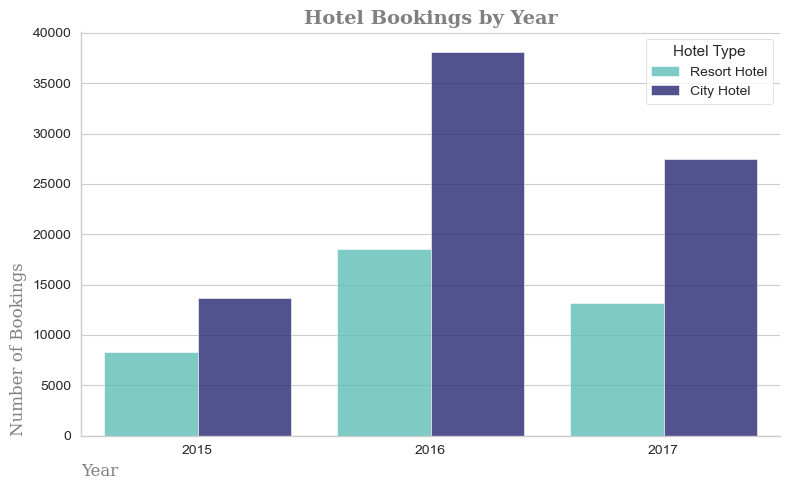

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  

custom_palette = ["#4ECDC4", "#1A1A80"] 

plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x="arrival_date_year",
    hue="hotel",
    palette=custom_palette,
    alpha=0.8
)

plt.xlabel("Year", loc="left", fontsize=12, color="gray", fontname="DejaVu Serif")
plt.ylabel("Number of Bookings", loc="bottom", fontsize=12, color="gray", fontname="DejaVu Serif")
plt.title("Hotel Bookings by Year", fontsize=14, fontweight="bold", color="gray", fontname="DejaVu Serif")

plt.legend(title="Hotel Type", title_fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine() 
plt.tight_layout()
plt.show()


In [21]:
data['arrival_date_month'] = pd.Categorical(
    data['arrival_date_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

x = data.groupby(["hotel","arrival_date_month"], observed=True)["adr"].mean().unstack()
x

arrival_date_month,January,February,March,April,May,June,July,August,September,October,November,December
hotel,,,,,,,,,,,,
City Hotel,82.628986,85.088278,92.643116,111.251838,121.638560,119.074341,110.734292,114.680455,110.004661,99.974498,88.069601,88.826307
Resort Hotel,49.461883,55.171930,57.520147,77.849496,78.758134,110.444749,155.181299,186.790574,93.252030,62.097617,48.273993,68.984230


C:\Users\pc\AppData\Local\Temp\ipykernel_21912\2035215356.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x.columns, rotation=45)


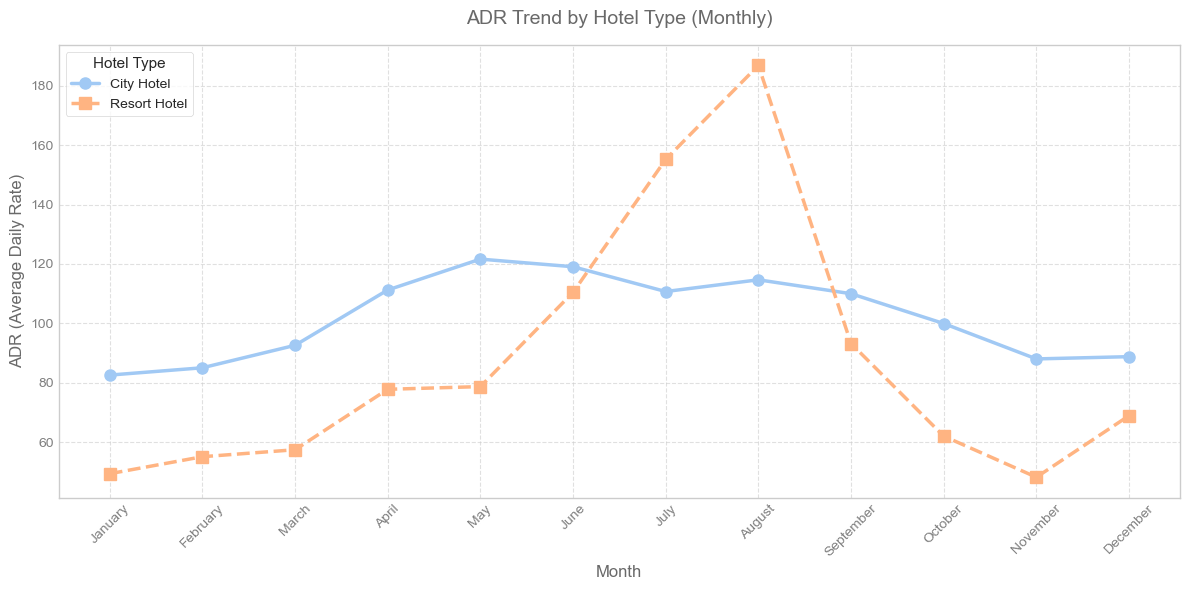

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid") 

colors = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x.loc["City Hotel"], marker="o", linestyle='-', linewidth=2.5,
        markersize=8, label="City Hotel", color=colors[0])
ax.plot(x.loc["Resort Hotel"], marker="s", linestyle='--', linewidth=2.5,
        markersize=8, label="Resort Hotel", color=colors[1])

ax.set_xlabel('Month', fontsize=12, color="dimgray", fontname="Arial")
ax.set_ylabel('ADR (Average Daily Rate)', fontsize=12, color="dimgray", fontname="Arial")
ax.set_title('ADR Trend by Hotel Type (Monthly)', fontsize=14, color="dimgray", fontname="Arial", pad=15)

ax.tick_params(axis='both', labelsize=10, colors='gray')
ax.set_xticklabels(x.columns, rotation=45)

ax.legend(title="Hotel Type", fontsize=10, title_fontsize=11, loc='upper left', frameon=True, facecolor='white')

ax.grid(True, which='major', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [23]:
data.groupby("hotel")["adr"].aggregate(["mean","std","median","min","max"])


,mean,std,median,min,max
hotel,,,,,
City Hotel,105.304465,43.602954,99.9,0.00,5400.0
Resort Hotel,94.952930,61.442418,75.0,-6.38,508.0


In [24]:
data_cleaned = data.dropna(subset="country")

book_country = data_cleaned.groupby("country").size().sort_values(ascending=False)
book_country.head(10)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
dtype: int64

C:\Users\pc\AppData\Local\Temp\ipykernel_21912\2515141166.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


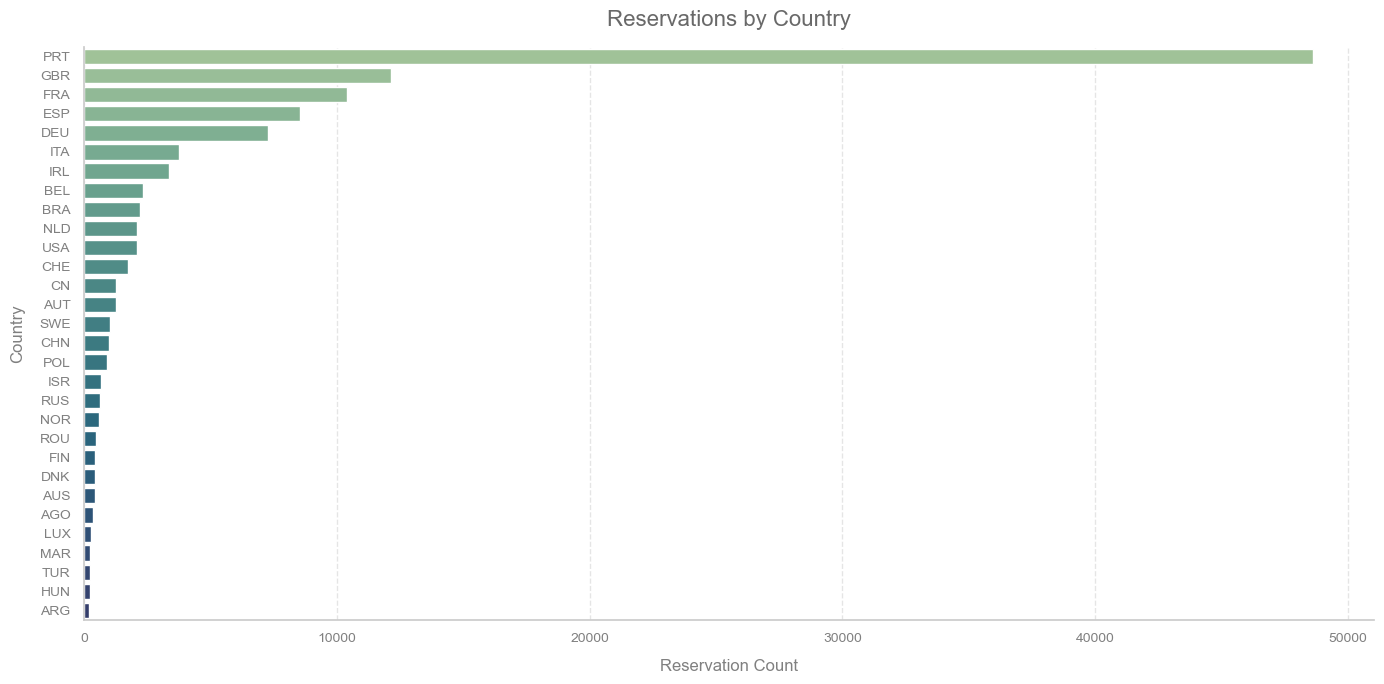

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig = plt.figure(figsize=(14, 7))

palette = sns.color_palette("crest", n_colors=30)

# Plot
sns.barplot(
    x=book_country[0:30].values,
    y=book_country[0:30].index,
    palette=palette
)

plt.title("Reservations by Country", fontsize=16, color="dimgray", fontname="Arial", pad=15)
plt.xlabel("Reservation Count", fontsize=12, color="gray", fontname="Arial", labelpad=10)
plt.ylabel("Country", fontsize=12, color="gray", fontname="Arial", labelpad=10)

plt.xticks(fontsize=10, color="gray")
plt.yticks(fontsize=10, color="gray")

plt.grid(axis='x', linestyle='--', alpha=0.5)

sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


In [26]:
book_channel = data.groupby("market_segment").size().sort_values(ascending=False)
book_channel

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
dtype: int64

C:\Users\pc\AppData\Local\Temp\ipykernel_21912\2040460278.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
C:\Users\pc\AppData\Local\Temp\ipykernel_21912\2040460278.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


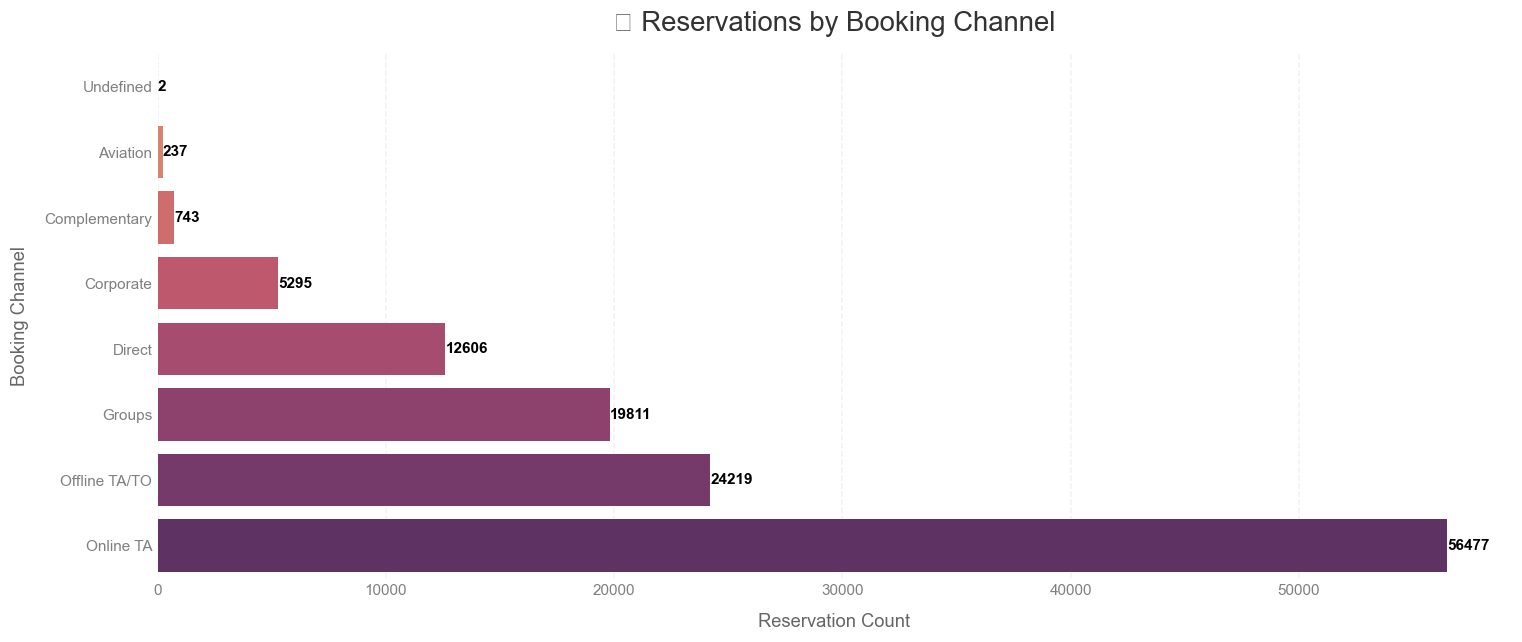

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

book_channel_sorted = book_channel.sort_values(ascending=True)

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("flare")

fig, ax = plt.subplots(figsize=(14, 6), dpi=110)

bars = sns.barplot(
    x=book_channel_sorted.values,
    y=book_channel_sorted.index,
    palette=sns.color_palette("flare", n_colors=len(book_channel_sorted)),
    ax=ax
)

for i, (value, label) in enumerate(zip(book_channel_sorted.values, book_channel_sorted.index)):
    ax.text(value + 1, i, f'{int(value)}', va='center', fontsize=10, color='black', fontweight='bold')

ax.set_title("📊 Reservations by Booking Channel", fontsize=18, fontname="Arial", color="#333333", pad=15)
ax.set_xlabel("Reservation Count", fontsize=12, color="#666666", labelpad=10)
ax.set_ylabel("Booking Channel", fontsize=12, color="#666666", labelpad=10)

ax.tick_params(axis='x', colors='gray', labelsize=10)
ax.tick_params(axis='y', colors='gray', labelsize=10)

ax.grid(axis='x', linestyle='--', alpha=0.25)
sns.despine(left=True, bottom=True)

for patch in bars.patches:
    patch.set_linewidth(0)
    patch.set_edgecolor("none")

plt.tight_layout()
plt.show()


In [28]:
data["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [29]:
meal_by_hotel = data.groupby(["hotel","meal"]).size().unstack()
meal_by_hotel

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,62305.0,44.0,6417.0,10564.0,NaN
Resort Hotel,30005.0,754.0,8046.0,86.0,1169.0


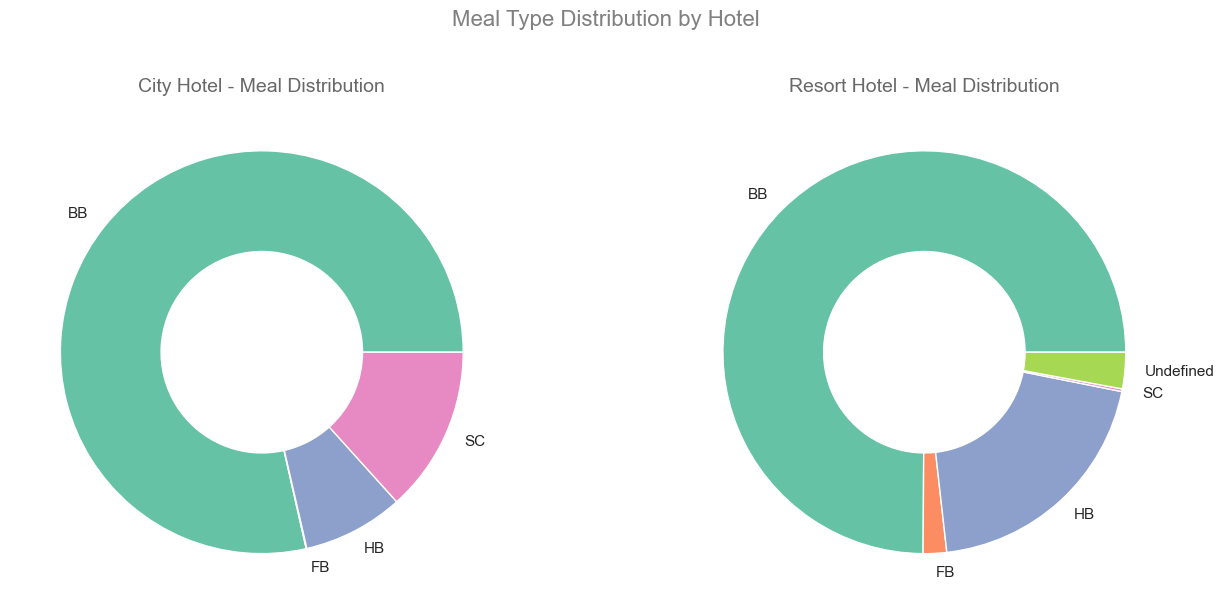

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("Set2", n_colors=5)

city_meals = meal_by_hotel.loc["City Hotel"].dropna()
resort_meals = meal_by_hotel.loc["Resort Hotel"].dropna()

city_labels = city_meals.index
resort_labels = resort_meals.index

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

axes[0].pie(
    city_meals,
    labels=city_labels,
    colors=custom_palette[:len(city_meals)],
    wedgeprops=dict(width=0.5, edgecolor='white')
)
axes[0].set_title("City Hotel - Meal Distribution", fontsize=14, fontname="Arial", color="dimgray")

axes[1].pie(
    resort_meals,
    labels=resort_labels,
    colors=custom_palette[:len(resort_meals)],
    wedgeprops=dict(width=0.5, edgecolor='white')
)
axes[1].set_title("Resort Hotel - Meal Distribution", fontsize=14, fontname="Arial", color="dimgray")

plt.suptitle("Meal Type Distribution by Hotel", fontsize=16, fontname="Arial", color="gray", y=1.02)
plt.tight_layout()
plt.show()
